# Convolutional Neural Networks

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def conv2d(image, kernel):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width   = image.shape
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    output = np.zeros((output_height, output_width))
    
    for i in range(output_height):
        for j in range(output_width):
            region = image[i:i+kernel_height, j:j+kernel_width]
            output[i, j] = np.sum(region * kernel)
    
    return output

In [3]:
def relu(x):
    return np.maximum(0, x)

In [4]:
def max_pooling(image, pool_size=2):
    image_height, image_width = image.shape

    output_height = (image_height + pool_size - 1) // pool_size
    output_width = (image_width + pool_size - 1) // pool_size
    output = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            start_i = i * pool_size
            start_j = j * pool_size
            end_i = min(start_i + pool_size, image_height)
            end_j = min(start_j + pool_size, image_width)

            region = image[start_i:end_i, start_j:end_j]
            output[i, j] = np.max(region)

    return output

In [5]:
def avg_pooling(image, pool_size=2):
    image_height, image_width = image.shape

    output_height = (image_height + pool_size - 1) // pool_size
    output_width = (image_width + pool_size - 1) // pool_size
    output = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            start_i = i * pool_size
            start_j = j * pool_size
            end_i = min(start_i + pool_size, image_height)
            end_j = min(start_j + pool_size, image_width)

            region = image[start_i:end_i, start_j:end_j]
            output[i, j] = np.average(region)

    return output

In [6]:
def dense_layer(inputs, weights, bias):
    return np.dot(inputs, weights) + bias

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

# Working Example

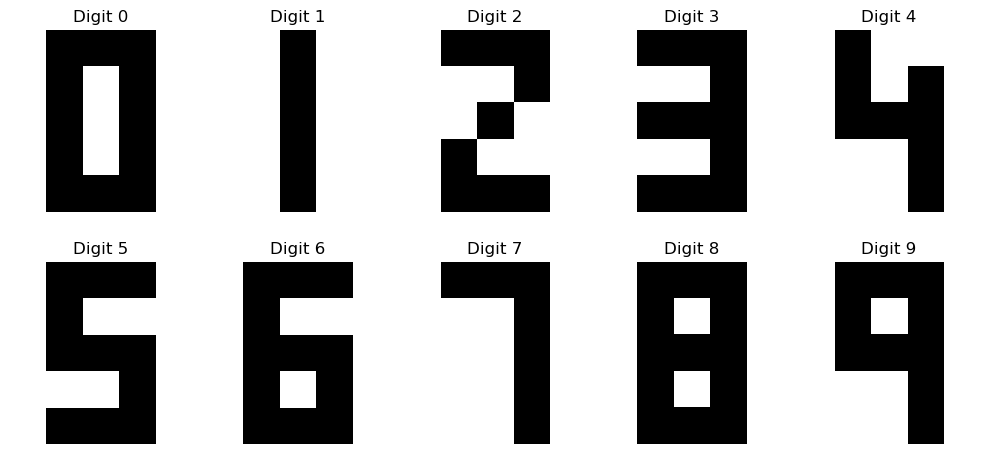

In [7]:
dataset = [
    np.array([
        [0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0],
        [0, 1, 0, 1, 0],
        [0, 1, 0, 1, 0],
        [0, 1, 1, 1, 0]
    ]),
    np.array([
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0]
    ]),
    np.array([
        [0, 1, 1, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 1, 1, 1, 0]
    ]),
    np.array([
        [0, 1, 1, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 1, 1, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 1, 1, 1, 0]
    ]),
    np.array([
        [0, 1, 0, 0, 0],
        [0, 1, 0, 1, 0],
        [0, 1, 1, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0]
    ]),
    np.array([
        [0, 1, 1, 1, 0],
        [0, 1, 0, 0, 0],
        [0, 1, 1, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 1, 1, 1, 0]
    ]),
    np.array([
        [0, 1, 1, 1, 0],
        [0, 1, 0, 0, 0],
        [0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0],
        [0, 1, 1, 1, 0]
    ]),
    np.array([
        [0, 1, 1, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0]
    ]),
    np.array([
        [0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0],
        [0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0],
        [0, 1, 1, 1, 0]
    ]),
    np.array([
        [0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0],
        [0, 1, 1, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0]
    ])
    
]

labels = [
    np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),  # Label for first image
    np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]),  # Label for first image
    np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]),  # Label for second image
    np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]),  # Label for first image
    np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]),  # Label for first image
    np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]),  # Label for first image
    np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),  # Label for first image
    np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),  # Label for first image
    np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),  # Label for first image
    np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]),  # Label for first image
]

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(dataset[i], cmap='gray_r')
    ax.set_title(f"Digit {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [8]:
img = dataset[0]  
print("image shape:", img.shape)
kernel = np.random.randn(3, 3)

feature_map  = conv2d(img, kernel)
activated    = relu(feature_map)
pooled       = max_pooling(activated, pool_size=2)
flattened    = pooled.flatten()

print("Kernel:\n", kernel)
print("Feature Map Shape:", feature_map.shape)
print("Feature Map:\n", feature_map)
print("Activated Feature Map:\n", activated)
print("Pooled Feature Map:\n", pooled)  
print("Flattened Feature Map:\n", flattened)


image shape: (5, 5)
Kernel:
 [[ 0.50012816 -1.18587272  1.21206181]
 [ 0.12368841 -0.79778235 -0.95130399]
 [-0.44365667  1.90970086  0.62584275]]
Feature Map Shape: (3, 3)
Feature Map:
 [[ 1.1381076  -0.11911225  0.42617395]
 [-0.07395421  1.06676048 -0.07395421]
 [ 0.55188854  2.97646133 -0.51761088]]
Activated Feature Map:
 [[1.1381076  0.         0.42617395]
 [0.         1.06676048 0.        ]
 [0.55188854 2.97646133 0.        ]]
Pooled Feature Map:
 [[1.1381076  0.42617395]
 [2.97646133 0.        ]]
Flattened Feature Map:
 [1.1381076  0.42617395 2.97646133 0.        ]


First Epoch, First Image feature_map:
 [[ 1.04270559  3.40476972  0.89173121]
 [ 0.39501705  3.54303402  0.39501705]
 [-0.07445733  4.31046875  1.97422987]]
First Epoch, First Image output_layer:
 [0.10207149 0.1029142  0.11063334 0.1040532  0.09178496 0.09908408
 0.09643855 0.09856632 0.09880543 0.09564843]
Learning Rate 0.1, Epoch 1, Loss: 2.9354
Learning Rate 0.1, Epoch 2, Loss: 2.2979
Learning Rate 0.1, Epoch 3, Loss: 2.0932
Learning Rate 0.1, Epoch 4, Loss: 1.9549
Learning Rate 0.1, Epoch 5, Loss: 1.8427
Learning Rate 0.1, Epoch 6, Loss: 1.7425
Learning Rate 0.1, Epoch 7, Loss: 1.6491
Learning Rate 0.1, Epoch 8, Loss: 1.5611
Learning Rate 0.1, Epoch 9, Loss: 1.4823
Learning Rate 0.1, Epoch 10, Loss: 1.4056
Learning Rate 0.1, Epoch 11, Loss: 1.3376
Learning Rate 0.1, Epoch 12, Loss: 1.2710
Learning Rate 0.1, Epoch 13, Loss: 1.2127
Learning Rate 0.1, Epoch 14, Loss: 1.1521
Learning Rate 0.1, Epoch 15, Loss: 1.1056
Learning Rate 0.1, Epoch 16, Loss: 1.0513
Learning Rate 0.1, Epoch 17

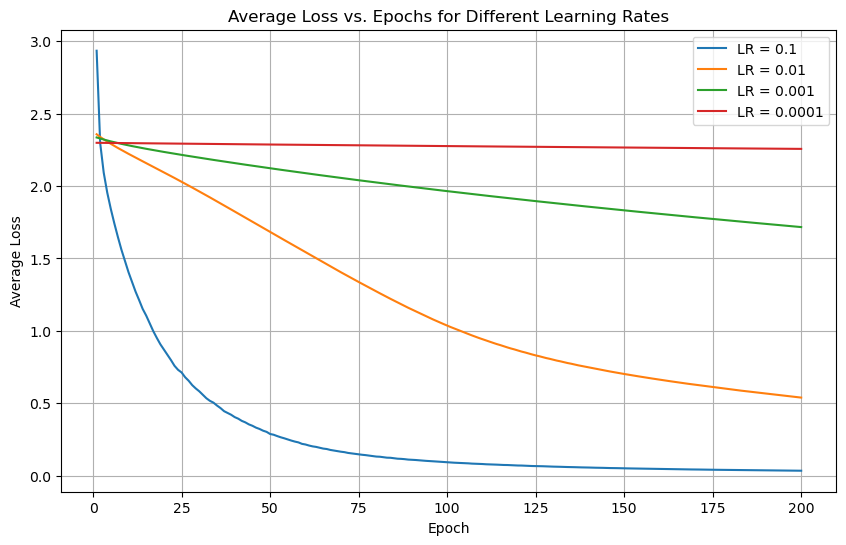

In [9]:

np.random.seed(42)
learning_rates = [0.1, 0.01, 0.001, 0.0001]
epochs = 200
loss_history = {lr: [] for lr in learning_rates}

for lr in learning_rates:
    kernel = np.random.randn(3, 3)
    fc_weights = np.random.randn(4, 10) * 0.01  
    fc_bias = np.random.randn(10) * 0.01

    for epoch in range(epochs):
        total_loss = 0
        for idx, (img, label) in enumerate(zip(dataset, labels)):
            # Forward
            feature_map = conv2d(img, kernel)
            activated = relu(feature_map)
            pooled = max_pooling(activated, pool_size=2)
            flattened = pooled.flatten()
            dense_output = dense_layer(flattened, fc_weights, fc_bias)
            output_layer = softmax(dense_output)

           
            if idx == 0:
                if epoch == 0:
                    print("First Epoch, First Image feature_map:\n", feature_map)
                    print("First Epoch, First Image output_layer:\n", output_layer)
                if epoch == epochs - 1:
                    print("Last Epoch, First Image feature_map:\n", feature_map)
                    print("Last Epoch, First Image output_layer:\n", output_layer)

            # Backward
            loss_gradient = output_layer - label
            fc_weights_gradient = np.dot(flattened[:, np.newaxis], loss_gradient[np.newaxis, :])
            fc_bias_gradient = loss_gradient
            flattened_gradient = np.dot(fc_weights, loss_gradient)
            pooled_gradient = flattened_gradient.reshape(pooled.shape)
            feature_map_gradient = np.zeros_like(activated)
            for i in range(pooled.shape[0]):
                for j in range(pooled.shape[1]):
                    max_val = pooled[i, j]
                    for m in range(2):
                        for n in range(2):
                            orig_x, orig_y = i*2 + m, j*2 + n
                            if orig_x < activated.shape[0] and orig_y < activated.shape[1]:
                                if activated[orig_x, orig_y] == max_val:
                                    feature_map_gradient[orig_x, orig_y] = pooled_gradient[i, j]
            feature_map_gradient *= np.where(feature_map > 0, 1, 0)
            kernel_gradient = np.zeros_like(kernel)
            for i in range(kernel.shape[0]):
                for j in range(kernel.shape[1]):
                    kernel_gradient[i, j] = np.sum(img[i:i+feature_map.shape[0], j:j+feature_map.shape[1]] * feature_map_gradient)
            fc_weights -= lr * fc_weights_gradient  
            fc_bias -= lr * fc_bias_gradient
            kernel -= lr * kernel_gradient

            loss = -np.sum(label * np.log(output_layer + 1e-9))
            total_loss += loss

        avg_loss = total_loss / len(dataset)
        loss_history[lr].append(avg_loss)  
        print(f"Learning Rate {lr}, Epoch {epoch+1}, Loss: {avg_loss:.4f}")

    print("Updated Kernel:", kernel)
    print("feature_map shape:", feature_map.shape)
    print("activated shape:", activated.shape)
    print("pooled shape:", pooled.shape)
    print("flattened shape:", flattened.shape)
    print("dense_output shape:", dense_output.shape)
    print("output_layer shape:", output_layer.shape)

# Matplotlib Plot
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(range(1, epochs + 1), loss_history[lr], label=f'LR = {lr}')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Average Loss vs. Epochs for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

In [10]:

np.random.seed(42)
kernel_sizes = [2, 3, 5]
epochs = 200
learning_rate = 0.1
final_losses = {}

for kernel_size in kernel_sizes:
    kernel = np.random.randn(kernel_size, kernel_size)
    
    feature_map = conv2d(dataset[0], kernel)
    activated = relu(feature_map)
    pooled = max_pooling(activated, pool_size=2)
    flattened = pooled.flatten()
    fc_weights = np.random.randn(len(flattened), 10) * 0.01
    fc_bias = np.random.randn(10) * 0.01

    for epoch in range(epochs):
        total_loss = 0
        for img, label in zip(dataset, labels):
            # Forward
            feature_map = conv2d(img, kernel)
            activated = relu(feature_map)
            pooled = max_pooling(activated, pool_size=2)
            flattened = pooled.flatten()
            dense_output = dense_layer(flattened, fc_weights, fc_bias)
            output_layer = softmax(dense_output)

            # Backward
            loss_gradient = output_layer - label
            fc_weights_gradient = np.dot(flattened[:, np.newaxis], loss_gradient[np.newaxis, :])
            fc_bias_gradient = loss_gradient
            flattened_gradient = np.dot(fc_weights, loss_gradient)
            pooled_gradient = flattened_gradient.reshape(pooled.shape)
            feature_map_gradient = np.zeros_like(activated)
            for i in range(pooled.shape[0]):
                for j in range(pooled.shape[1]):
                    max_val = pooled[i, j]
                    for m in range(2):
                        for n in range(2):
                            orig_x, orig_y = i*2 + m, j*2 + n
                            if orig_x < activated.shape[0] and orig_y < activated.shape[1]:
                                if activated[orig_x, orig_y] == max_val:
                                    feature_map_gradient[orig_x, orig_y] = pooled_gradient[i, j]
            feature_map_gradient *= np.where(feature_map > 0, 1, 0)
            kernel_gradient = np.zeros_like(kernel)
            for i in range(kernel.shape[0]):
                for j in range(kernel.shape[1]):
                    kernel_gradient[i, j] = np.sum(img[i:i+feature_map.shape[0], j:j+feature_map.shape[1]] * feature_map_gradient)
            fc_weights -= learning_rate * fc_weights_gradient
            fc_bias -= learning_rate * fc_bias_gradient
            kernel -= learning_rate * kernel_gradient

            loss = -np.sum(label * np.log(output_layer + 1e-9))
            total_loss += loss

        avg_loss = total_loss / len(dataset)
        if epoch == epochs - 1: 
            final_losses[kernel_size] = avg_loss
            print(f"Kernel Size {kernel_size}x{kernel_size}, Epoch {epoch+1}, Loss: {avg_loss:.4f}")

print("Final Losses at 200th Epoch:", final_losses)

Kernel Size 2x2, Epoch 200, Loss: 0.1743
Kernel Size 3x3, Epoch 200, Loss: 0.0122
Kernel Size 5x5, Epoch 200, Loss: 1.5768
Final Losses at 200th Epoch: {2: 0.17431334203007093, 3: 0.01219679585762106, 5: 1.5768026150983059}


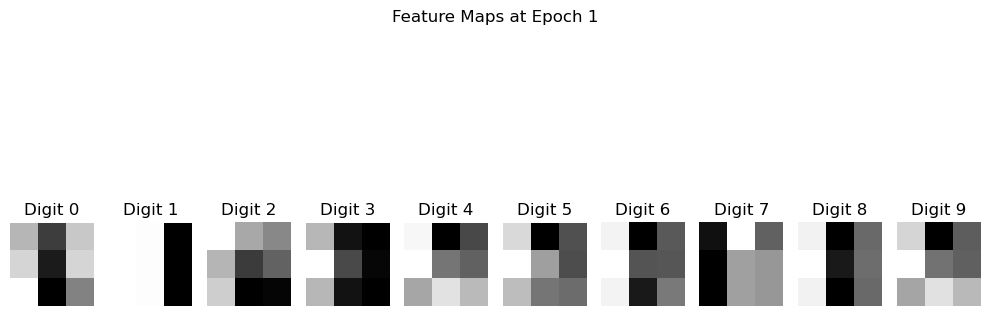

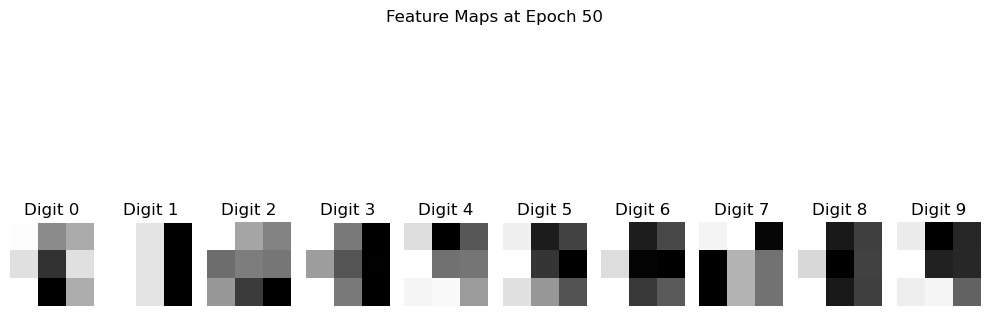

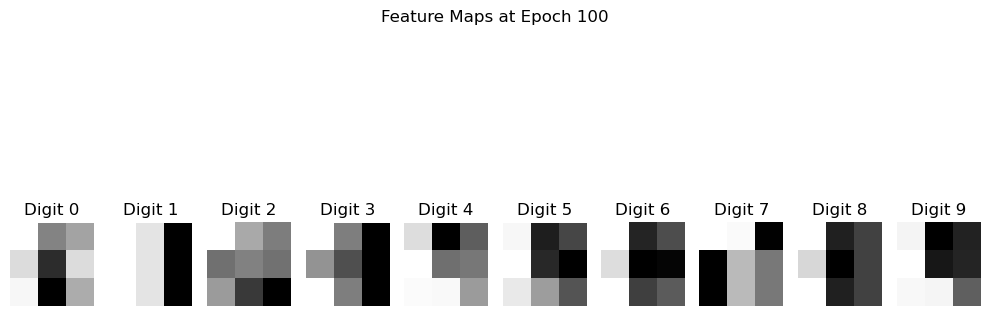

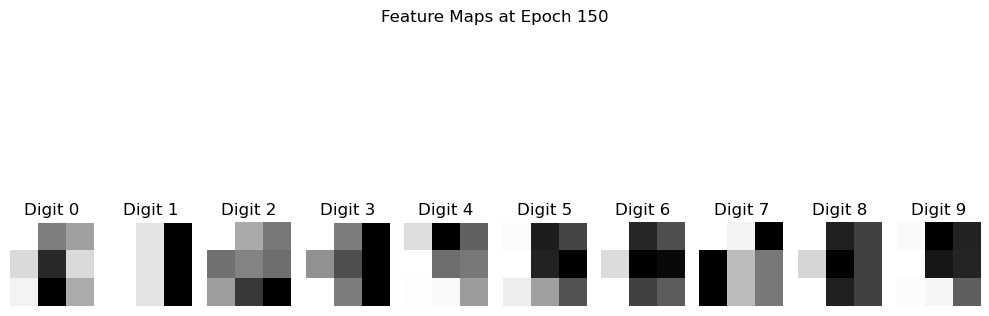

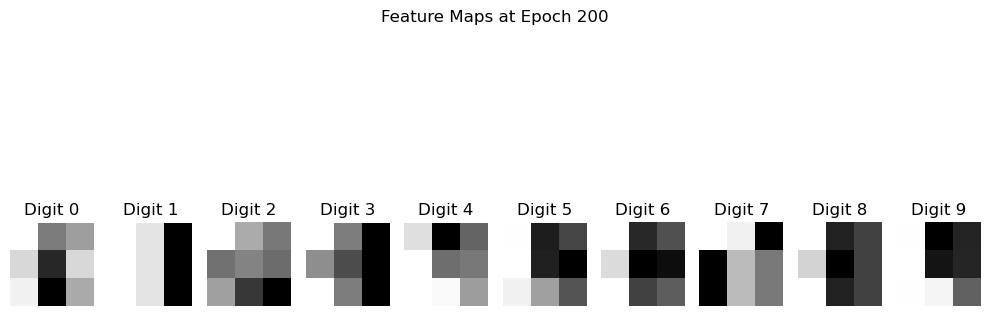

In [11]:

np.random.seed(42)
kernel = np.random.randn(3, 3)
fc_weights = np.random.randn(4, 10) * 0.01  
fc_bias = np.random.randn(10) * 0.01
epochs = 200
learning_rate = 0.1
check_epochs = [1, 50, 100, 150, 200]

for epoch in range(epochs):
    total_loss = 0
    for idx, (img, label) in enumerate(zip(dataset, labels)):
        # Forward
        feature_map = conv2d(img, kernel)
        activated = relu(feature_map)
        pooled = max_pooling(activated, pool_size=2)
        flattened = pooled.flatten()
        dense_output = dense_layer(flattened, fc_weights, fc_bias)
        output_layer = softmax(dense_output)

        # Backward
        loss_gradient = output_layer - label
        fc_weights_gradient = np.dot(flattened[:, np.newaxis], loss_gradient[np.newaxis, :])
        fc_bias_gradient = loss_gradient
        flattened_gradient = np.dot(fc_weights, loss_gradient)
        pooled_gradient = flattened_gradient.reshape(pooled.shape)
        feature_map_gradient = np.zeros_like(activated)
        for i in range(pooled.shape[0]):
            for j in range(pooled.shape[1]):
                max_val = pooled[i, j]
                for m in range(2):
                    for n in range(2):
                        orig_x, orig_y = i*2 + m, j*2 + n
                        if orig_x < activated.shape[0] and orig_y < activated.shape[1]:
                            if activated[orig_x, orig_y] == max_val:
                                feature_map_gradient[orig_x, orig_y] = pooled_gradient[i, j]
        feature_map_gradient *= np.where(feature_map > 0, 1, 0)
        kernel_gradient = np.zeros_like(kernel)
        for i in range(kernel.shape[0]):
            for j in range(kernel.shape[1]):
                kernel_gradient[i, j] = np.sum(img[i:i+feature_map.shape[0], j:j+feature_map.shape[1]] * feature_map_gradient)
        fc_weights -= learning_rate * fc_weights_gradient
        fc_bias -= learning_rate * fc_bias_gradient
        kernel -= learning_rate * kernel_gradient

        loss = -np.sum(label * np.log(output_layer + 1e-9))
        total_loss += loss

    avg_loss = total_loss / len(dataset)
    

   
    if epoch + 1 in check_epochs:
        fig, axes = plt.subplots(1, 10, figsize=(10, 5))
        for i, ax in enumerate(axes.flat):
            ax.imshow(conv2d(dataset[i], kernel), cmap='gray_r')
            ax.set_title(f"Digit {i}")
            ax.axis('off')
        plt.suptitle(f"Feature Maps at Epoch {epoch+1}")
        plt.tight_layout()
        plt.show()



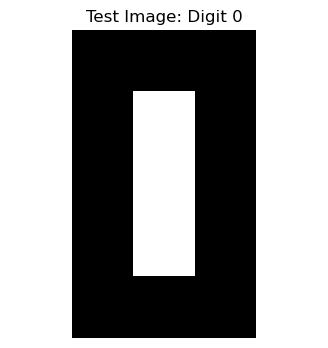

Without Noise - Predicted: 0 Actual: 0
Noise Level 0.1: Predicted Class = 0, Actual Class = 0
Noise Level 0.1: Predicted Class = 0, Actual Class = 0
Noise Level 0.1: Predicted Class = 0, Actual Class = 0
Noise Level 0.1: Predicted Class = 0, Actual Class = 0
Noise Level 0.1: Predicted Class = 0, Actual Class = 0
Noise Level 0.1: Predicted Class = 0, Actual Class = 0
Noise Level 0.1: Predicted Class = 0, Actual Class = 0
Noise Level 0.1: Predicted Class = 0, Actual Class = 0
Noise Level 0.1: Predicted Class = 0, Actual Class = 0
Noise Level 0.1: Predicted Class = 0, Actual Class = 0
Noise Level 0.1: Predicted Class = 0, Actual Class = 0
Noise Level 0.1: Predicted Class = 0, Actual Class = 0
Noise Level 0.1: Predicted Class = 0, Actual Class = 0
Noise Level 0.1: Predicted Class = 0, Actual Class = 0
Noise Level 0.1: Predicted Class = 0, Actual Class = 0
Noise Level 0.1: Predicted Class = 0, Actual Class = 0
Noise Level 0.1: Predicted Class = 0, Actual Class = 0
Noise Level 0.1: Predicted

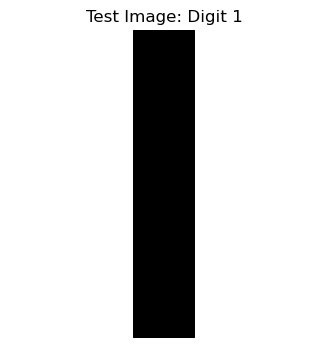

Without Noise - Predicted: 1 Actual: 1
Noise Level 0.1: Predicted Class = 1, Actual Class = 1
Noise Level 0.1: Predicted Class = 1, Actual Class = 1
Noise Level 0.1: Predicted Class = 1, Actual Class = 1
Noise Level 0.1: Predicted Class = 1, Actual Class = 1
Noise Level 0.1: Predicted Class = 1, Actual Class = 1
Noise Level 0.1: Predicted Class = 1, Actual Class = 1
Noise Level 0.1: Predicted Class = 1, Actual Class = 1
Noise Level 0.1: Predicted Class = 1, Actual Class = 1
Noise Level 0.1: Predicted Class = 1, Actual Class = 1
Noise Level 0.1: Predicted Class = 1, Actual Class = 1
Noise Level 0.1: Predicted Class = 1, Actual Class = 1
Noise Level 0.1: Predicted Class = 1, Actual Class = 1
Noise Level 0.1: Predicted Class = 1, Actual Class = 1
Noise Level 0.1: Predicted Class = 1, Actual Class = 1
Noise Level 0.1: Predicted Class = 1, Actual Class = 1
Noise Level 0.1: Predicted Class = 1, Actual Class = 1
Noise Level 0.1: Predicted Class = 1, Actual Class = 1
Noise Level 0.1: Predicted

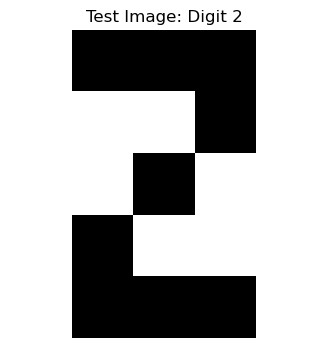

Without Noise - Predicted: 2 Actual: 2
Noise Level 0.1: Predicted Class = 2, Actual Class = 2
Noise Level 0.1: Predicted Class = 2, Actual Class = 2
Noise Level 0.1: Predicted Class = 2, Actual Class = 2
Noise Level 0.1: Predicted Class = 2, Actual Class = 2
Noise Level 0.1: Predicted Class = 2, Actual Class = 2
Noise Level 0.1: Predicted Class = 2, Actual Class = 2
Noise Level 0.1: Predicted Class = 2, Actual Class = 2
Noise Level 0.1: Predicted Class = 2, Actual Class = 2
Noise Level 0.1: Predicted Class = 2, Actual Class = 2
Noise Level 0.1: Predicted Class = 2, Actual Class = 2
Noise Level 0.1: Predicted Class = 2, Actual Class = 2
Noise Level 0.1: Predicted Class = 2, Actual Class = 2
Noise Level 0.1: Predicted Class = 2, Actual Class = 2
Noise Level 0.1: Predicted Class = 2, Actual Class = 2
Noise Level 0.1: Predicted Class = 2, Actual Class = 2
Noise Level 0.1: Predicted Class = 2, Actual Class = 2
Noise Level 0.1: Predicted Class = 2, Actual Class = 2
Noise Level 0.1: Predicted

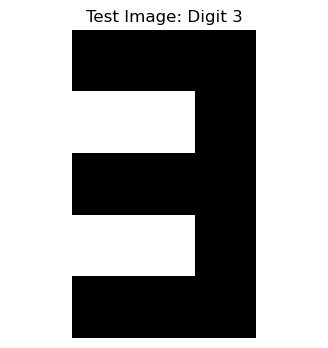

Without Noise - Predicted: 3 Actual: 3
Noise Level 0.1: Predicted Class = 3, Actual Class = 3
Noise Level 0.1: Predicted Class = 3, Actual Class = 3
Noise Level 0.1: Predicted Class = 3, Actual Class = 3
Noise Level 0.1: Predicted Class = 3, Actual Class = 3
Noise Level 0.1: Predicted Class = 3, Actual Class = 3
Noise Level 0.1: Predicted Class = 3, Actual Class = 3
Noise Level 0.1: Predicted Class = 3, Actual Class = 3
Noise Level 0.1: Predicted Class = 3, Actual Class = 3
Noise Level 0.1: Predicted Class = 3, Actual Class = 3
Noise Level 0.1: Predicted Class = 3, Actual Class = 3
Noise Level 0.1: Predicted Class = 3, Actual Class = 3
Noise Level 0.1: Predicted Class = 3, Actual Class = 3
Noise Level 0.1: Predicted Class = 3, Actual Class = 3
Noise Level 0.1: Predicted Class = 3, Actual Class = 3
Noise Level 0.1: Predicted Class = 3, Actual Class = 3
Noise Level 0.1: Predicted Class = 3, Actual Class = 3
Noise Level 0.1: Predicted Class = 3, Actual Class = 3
Noise Level 0.1: Predicted

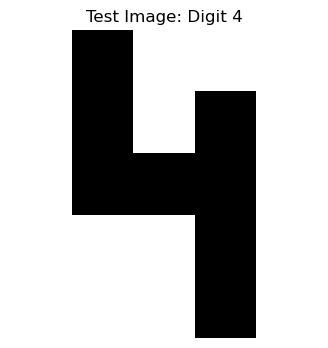

Without Noise - Predicted: 4 Actual: 4
Noise Level 0.1: Predicted Class = 4, Actual Class = 4
Noise Level 0.1: Predicted Class = 4, Actual Class = 4
Noise Level 0.1: Predicted Class = 4, Actual Class = 4
Noise Level 0.1: Predicted Class = 4, Actual Class = 4
Noise Level 0.1: Predicted Class = 4, Actual Class = 4
Noise Level 0.1: Predicted Class = 4, Actual Class = 4
Noise Level 0.1: Predicted Class = 4, Actual Class = 4
Noise Level 0.1: Predicted Class = 4, Actual Class = 4
Noise Level 0.1: Predicted Class = 4, Actual Class = 4
Noise Level 0.1: Predicted Class = 4, Actual Class = 4
Noise Level 0.1: Predicted Class = 4, Actual Class = 4
Noise Level 0.1: Predicted Class = 4, Actual Class = 4
Noise Level 0.1: Predicted Class = 4, Actual Class = 4
Noise Level 0.1: Predicted Class = 4, Actual Class = 4
Noise Level 0.1: Predicted Class = 4, Actual Class = 4
Noise Level 0.1: Predicted Class = 4, Actual Class = 4
Noise Level 0.1: Predicted Class = 4, Actual Class = 4
Noise Level 0.1: Predicted

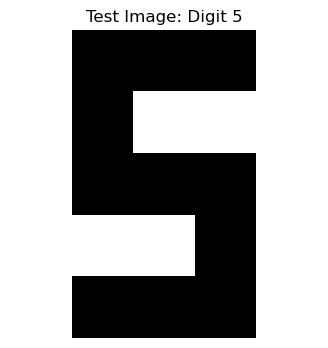

Without Noise - Predicted: 5 Actual: 5
Noise Level 0.1: Predicted Class = 5, Actual Class = 5
Noise Level 0.1: Predicted Class = 5, Actual Class = 5
Noise Level 0.1: Predicted Class = 5, Actual Class = 5
Noise Level 0.1: Predicted Class = 5, Actual Class = 5
Noise Level 0.1: Predicted Class = 5, Actual Class = 5
Noise Level 0.1: Predicted Class = 5, Actual Class = 5
Noise Level 0.1: Predicted Class = 5, Actual Class = 5
Noise Level 0.1: Predicted Class = 5, Actual Class = 5
Noise Level 0.1: Predicted Class = 5, Actual Class = 5
Noise Level 0.1: Predicted Class = 5, Actual Class = 5
Noise Level 0.1: Predicted Class = 5, Actual Class = 5
Noise Level 0.1: Predicted Class = 5, Actual Class = 5
Noise Level 0.1: Predicted Class = 5, Actual Class = 5
Noise Level 0.1: Predicted Class = 5, Actual Class = 5
Noise Level 0.1: Predicted Class = 5, Actual Class = 5
Noise Level 0.1: Predicted Class = 5, Actual Class = 5
Noise Level 0.1: Predicted Class = 5, Actual Class = 5
Noise Level 0.1: Predicted

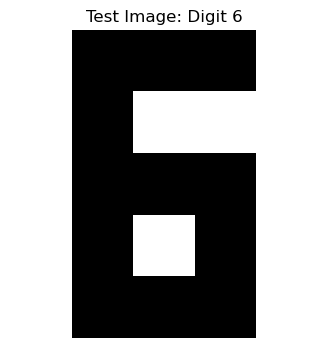

Without Noise - Predicted: 6 Actual: 6
Noise Level 0.1: Predicted Class = 6, Actual Class = 6
Noise Level 0.1: Predicted Class = 6, Actual Class = 6
Noise Level 0.1: Predicted Class = 6, Actual Class = 6
Noise Level 0.1: Predicted Class = 6, Actual Class = 6
Noise Level 0.1: Predicted Class = 6, Actual Class = 6
Noise Level 0.1: Predicted Class = 6, Actual Class = 6
Noise Level 0.1: Predicted Class = 6, Actual Class = 6
Noise Level 0.1: Predicted Class = 6, Actual Class = 6
Noise Level 0.1: Predicted Class = 6, Actual Class = 6
Noise Level 0.1: Predicted Class = 6, Actual Class = 6
Noise Level 0.1: Predicted Class = 6, Actual Class = 6
Noise Level 0.1: Predicted Class = 6, Actual Class = 6
Noise Level 0.1: Predicted Class = 6, Actual Class = 6
Noise Level 0.1: Predicted Class = 6, Actual Class = 6
Noise Level 0.1: Predicted Class = 6, Actual Class = 6
Noise Level 0.1: Predicted Class = 6, Actual Class = 6
Noise Level 0.1: Predicted Class = 6, Actual Class = 6
Noise Level 0.1: Predicted

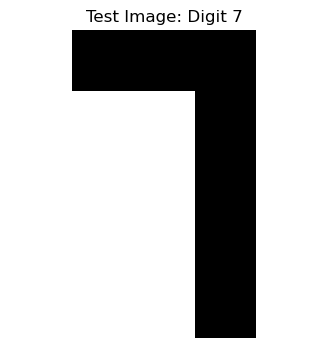

Without Noise - Predicted: 7 Actual: 7
Noise Level 0.1: Predicted Class = 7, Actual Class = 7
Noise Level 0.1: Predicted Class = 7, Actual Class = 7
Noise Level 0.1: Predicted Class = 7, Actual Class = 7
Noise Level 0.1: Predicted Class = 7, Actual Class = 7
Noise Level 0.1: Predicted Class = 7, Actual Class = 7
Noise Level 0.1: Predicted Class = 7, Actual Class = 7
Noise Level 0.1: Predicted Class = 7, Actual Class = 7
Noise Level 0.1: Predicted Class = 7, Actual Class = 7
Noise Level 0.1: Predicted Class = 7, Actual Class = 7
Noise Level 0.1: Predicted Class = 7, Actual Class = 7
Noise Level 0.1: Predicted Class = 7, Actual Class = 7
Noise Level 0.1: Predicted Class = 7, Actual Class = 7
Noise Level 0.1: Predicted Class = 7, Actual Class = 7
Noise Level 0.1: Predicted Class = 7, Actual Class = 7
Noise Level 0.1: Predicted Class = 7, Actual Class = 7
Noise Level 0.1: Predicted Class = 7, Actual Class = 7
Noise Level 0.1: Predicted Class = 7, Actual Class = 7
Noise Level 0.1: Predicted

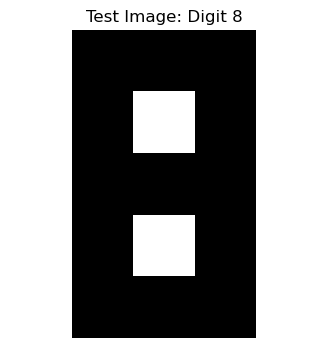

Without Noise - Predicted: 8 Actual: 8
Noise Level 0.1: Predicted Class = 8, Actual Class = 8
Noise Level 0.1: Predicted Class = 8, Actual Class = 8
Noise Level 0.1: Predicted Class = 8, Actual Class = 8
Noise Level 0.1: Predicted Class = 8, Actual Class = 8
Noise Level 0.1: Predicted Class = 8, Actual Class = 8
Noise Level 0.1: Predicted Class = 8, Actual Class = 8
Noise Level 0.1: Predicted Class = 8, Actual Class = 8
Noise Level 0.1: Predicted Class = 8, Actual Class = 8
Noise Level 0.1: Predicted Class = 8, Actual Class = 8
Noise Level 0.1: Predicted Class = 8, Actual Class = 8
Noise Level 0.1: Predicted Class = 8, Actual Class = 8
Noise Level 0.1: Predicted Class = 8, Actual Class = 8
Noise Level 0.1: Predicted Class = 8, Actual Class = 8
Noise Level 0.1: Predicted Class = 8, Actual Class = 8
Noise Level 0.1: Predicted Class = 8, Actual Class = 8
Noise Level 0.1: Predicted Class = 8, Actual Class = 8
Noise Level 0.1: Predicted Class = 8, Actual Class = 8
Noise Level 0.1: Predicted

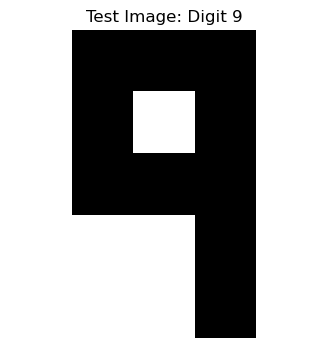

Without Noise - Predicted: 9 Actual: 9
Noise Level 0.1: Predicted Class = 9, Actual Class = 9
Noise Level 0.1: Predicted Class = 9, Actual Class = 9
Noise Level 0.1: Predicted Class = 9, Actual Class = 9
Noise Level 0.1: Predicted Class = 9, Actual Class = 9
Noise Level 0.1: Predicted Class = 9, Actual Class = 9
Noise Level 0.1: Predicted Class = 9, Actual Class = 9
Noise Level 0.1: Predicted Class = 9, Actual Class = 9
Noise Level 0.1: Predicted Class = 9, Actual Class = 9
Noise Level 0.1: Predicted Class = 9, Actual Class = 9
Noise Level 0.1: Predicted Class = 9, Actual Class = 9
Noise Level 0.1: Predicted Class = 9, Actual Class = 9
Noise Level 0.1: Predicted Class = 9, Actual Class = 9
Noise Level 0.1: Predicted Class = 9, Actual Class = 9
Noise Level 0.1: Predicted Class = 9, Actual Class = 9
Noise Level 0.1: Predicted Class = 9, Actual Class = 9
Noise Level 0.1: Predicted Class = 9, Actual Class = 9
Noise Level 0.1: Predicted Class = 9, Actual Class = 9
Noise Level 0.1: Predicted

In [12]:
for i in range(10):
    usethis = i
    test_image = dataset[usethis]
    test_label = labels[usethis]

    plt.figure(figsize=(4, 4))
    plt.imshow(test_image, cmap='gray_r')
    plt.title(f"Test Image: Digit {usethis}")
    plt.axis('off')
    plt.show()

    feature_map = conv2d(test_image, kernel)
    activated = relu(feature_map)
    pooled = max_pooling(activated, pool_size=2)
    flattened = pooled.flatten()
    dense_output = dense_layer(flattened, fc_weights, fc_bias)
    output_layer = softmax(dense_output)
    predicted_class = np.argmax(output_layer)
    actual_class = np.argmax(test_label)
    print("Without Noise - Predicted:", predicted_class, "Actual:", actual_class)


    # Noise robustness test
    noise_levels = [0.1, 0.2, 0.3, 0.4, 0.5]
    num_trials = 100
    robustness_results = {}

    for noise_level in noise_levels:
        correct_count = 0
        for _ in range(num_trials):
            noisy_image = test_image + np.random.normal(0, noise_level, test_image.shape)
            noisy_image = np.clip(noisy_image, 0, 1)
            feature_map = conv2d(noisy_image, kernel)
            activated = relu(feature_map)
            pooled = max_pooling(activated, pool_size=2)
            flattened = pooled.flatten()
            dense_output = dense_layer(flattened, fc_weights, fc_bias)
            output_layer = softmax(dense_output)
            predicted_class = np.argmax(output_layer)
            print(f"Noise Level {noise_level}: Predicted Class = {predicted_class}, Actual Class = {actual_class}")
            if predicted_class == actual_class:
                correct_count += 1
        accuracy = correct_count / num_trials * 100
        robustness_results[noise_level] = accuracy
        print(f"Noise Level {noise_level}: Accuracy = {accuracy:.2f}%")

In [13]:
for i in range(10):
    usethis = i
    test_image = dataset[usethis]
    test_label = labels[usethis]


    feature_map = conv2d(test_image, kernel)
    activated = relu(feature_map)
    pooled = max_pooling(activated, pool_size=2)
    flattened = pooled.flatten()
    dense_output = dense_layer(flattened, fc_weights, fc_bias)
    output_layer = softmax(dense_output)
    predicted_class = np.argmax(output_layer)
    actual_class = np.argmax(test_label)
    print("Without Noise - Predicted:", predicted_class, "Actual:", actual_class)


    # Noise robustness test
    noise_levels = [0.1, 0.2, 0.3, 0.4, 0.5]
    num_trials = 100
    robustness_results = {}

    for noise_level in noise_levels:
        correct_count = 0
        for _ in range(num_trials):
            noisy_image = test_image + np.random.normal(0, noise_level, test_image.shape)
            noisy_image = np.clip(noisy_image, 0, 1)
            feature_map = conv2d(noisy_image, kernel)
            activated = relu(feature_map)
            pooled = max_pooling(activated, pool_size=2)
            flattened = pooled.flatten()
            dense_output = dense_layer(flattened, fc_weights, fc_bias)
            output_layer = softmax(dense_output)
            predicted_class = np.argmax(output_layer)
           
            if predicted_class == actual_class:
                correct_count += 1
        accuracy = correct_count / num_trials * 100
        robustness_results[noise_level] = accuracy
        print(f"Noise Level {noise_level}: Accuracy = {accuracy:.2f}%")

Without Noise - Predicted: 0 Actual: 0
Noise Level 0.1: Accuracy = 100.00%
Noise Level 0.2: Accuracy = 94.00%
Noise Level 0.3: Accuracy = 71.00%
Noise Level 0.4: Accuracy = 64.00%
Noise Level 0.5: Accuracy = 53.00%
Without Noise - Predicted: 1 Actual: 1
Noise Level 0.1: Accuracy = 100.00%
Noise Level 0.2: Accuracy = 100.00%
Noise Level 0.3: Accuracy = 100.00%
Noise Level 0.4: Accuracy = 89.00%
Noise Level 0.5: Accuracy = 75.00%
Without Noise - Predicted: 2 Actual: 2
Noise Level 0.1: Accuracy = 100.00%
Noise Level 0.2: Accuracy = 95.00%
Noise Level 0.3: Accuracy = 86.00%
Noise Level 0.4: Accuracy = 55.00%
Noise Level 0.5: Accuracy = 35.00%
Without Noise - Predicted: 3 Actual: 3
Noise Level 0.1: Accuracy = 100.00%
Noise Level 0.2: Accuracy = 96.00%
Noise Level 0.3: Accuracy = 78.00%
Noise Level 0.4: Accuracy = 61.00%
Noise Level 0.5: Accuracy = 39.00%
Without Noise - Predicted: 4 Actual: 4
Noise Level 0.1: Accuracy = 98.00%
Noise Level 0.2: Accuracy = 88.00%
Noise Level 0.3: Accuracy = 6

In [14]:
noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
num_runs = 200


correct_counts = {i: {noise: 0 for noise in noise_levels} for i in range(10)}

for _ in range(num_runs):
    for i in range(10):
        test_image = dataset[i]
        test_label = labels[i]
        for noise in noise_levels:
            noisy_image = test_image + np.random.normal(0, noise, test_image.shape)
            noisy_image = np.clip(noisy_image, 0, 1)
            feature_map = conv2d(noisy_image, kernel)
            activated = relu(feature_map)
            pooled = max_pooling(activated, pool_size=2)
            flattened = pooled.flatten()
            dense_output = dense_layer(flattened, fc_weights, fc_bias)
            output_layer = softmax(dense_output)
            predicted_class = np.argmax(output_layer)
            actual_class = np.argmax(test_label)
            if predicted_class == actual_class:
                correct_counts[i][noise] += 1

# Print results
for digit in range(10):
    print(f"Digit {digit}:")
    for noise in noise_levels:
        accuracy = correct_counts[digit][noise] / num_runs * 100
        print(f"  Noise {noise}: Correct = {correct_counts[digit][noise]}, Accuracy = {accuracy:.2f}%")
    print()

Digit 0:
  Noise 0: Correct = 200, Accuracy = 100.00%
  Noise 0.1: Correct = 200, Accuracy = 100.00%
  Noise 0.2: Correct = 195, Accuracy = 97.50%
  Noise 0.3: Correct = 167, Accuracy = 83.50%
  Noise 0.4: Correct = 122, Accuracy = 61.00%
  Noise 0.5: Correct = 98, Accuracy = 49.00%

Digit 1:
  Noise 0: Correct = 200, Accuracy = 100.00%
  Noise 0.1: Correct = 200, Accuracy = 100.00%
  Noise 0.2: Correct = 200, Accuracy = 100.00%
  Noise 0.3: Correct = 198, Accuracy = 99.00%
  Noise 0.4: Correct = 188, Accuracy = 94.00%
  Noise 0.5: Correct = 155, Accuracy = 77.50%

Digit 2:
  Noise 0: Correct = 200, Accuracy = 100.00%
  Noise 0.1: Correct = 200, Accuracy = 100.00%
  Noise 0.2: Correct = 188, Accuracy = 94.00%
  Noise 0.3: Correct = 152, Accuracy = 76.00%
  Noise 0.4: Correct = 99, Accuracy = 49.50%
  Noise 0.5: Correct = 89, Accuracy = 44.50%

Digit 3:
  Noise 0: Correct = 200, Accuracy = 100.00%
  Noise 0.1: Correct = 200, Accuracy = 100.00%
  Noise 0.2: Correct = 185, Accuracy = 92.5

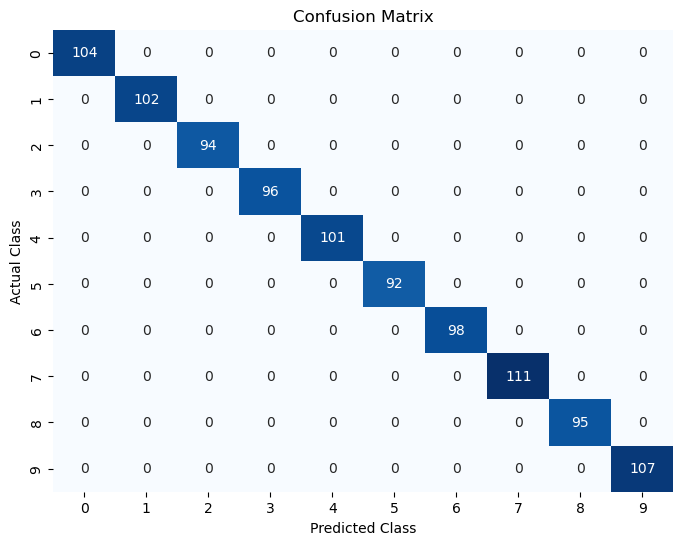

Confusion Matrix:
 [[104   0   0   0   0   0   0   0   0   0]
 [  0 102   0   0   0   0   0   0   0   0]
 [  0   0  94   0   0   0   0   0   0   0]
 [  0   0   0  96   0   0   0   0   0   0]
 [  0   0   0   0 101   0   0   0   0   0]
 [  0   0   0   0   0  92   0   0   0   0]
 [  0   0   0   0   0   0  98   0   0   0]
 [  0   0   0   0   0   0   0 111   0   0]
 [  0   0   0   0   0   0   0   0  95   0]
 [  0   0   0   0   0   0   0   0   0 107]]


In [15]:
import seaborn as sns

confusion_matrix = np.zeros((10, 10), dtype=int)

for _ in range(1000):
    i = np.random.randint(0, 10)
    test_image = dataset[i]
    test_label = labels[i] 
    feature_map = conv2d(test_image, kernel)
    activated = relu(feature_map)
    pooled = max_pooling(activated, pool_size=2)
    flattened = pooled.flatten()
    dense_output = dense_layer(flattened, fc_weights, fc_bias)
    output_layer = softmax(dense_output)
    predicted_class = np.argmax(output_layer)

    actual_class = np.argmax(test_label)
    confusion_matrix[actual_class][predicted_class] += 1

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix:\n", confusion_matrix)





In [16]:
tp = fp = fn = tn = 0
num_classes = 10

for cls in range(num_classes):
    tp_tmp = confusion_matrix[cls][cls]
    fp_tmp = confusion_matrix[:, cls].sum() - tp_tmp
    fn_tmp = confusion_matrix[cls, :].sum() - tp_tmp
    tn_tmp = confusion_matrix.sum() - (tp_tmp + fp_tmp + fn_tmp)
    tp += tp_tmp
    fp += fp_tmp
    fn += fn_tmp
    tn += tn_tmp

print(f"TP: {tp} | FN: {fn}")
print(f"FP: {fp} | TN: {tn}")



TP: 1000 | FN: 0
FP: 0 | TN: 9000


In [17]:
precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
neg_pred = tn / (tn + fn) if (tn + fn) > 0 else 0.0
accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0.0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Negative Prediction: {neg_pred:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1_score:.4f}")

Precision: 1.0000
Recall: 1.0000
Specificity: 1.0000
Negative Prediction: 1.0000
Accuracy: 1.0000
F1 Score: 1.0000


In [18]:
for cls in range(num_classes):
    tp_c = confusion_matrix[cls][cls]
    fp_c = confusion_matrix[:, cls].sum() - tp_c
    fn_c = confusion_matrix[cls, :].sum() - tp_c

    precision_c = tp_c / (tp_c + fp_c) if (tp_c + fp_c) > 0 else 0.0
    recall_c = tp_c / (tp_c + fn_c) if (tp_c + fn_c) > 0 else 0.0
    f1_c = 2 * (precision_c * recall_c) / (precision_c + recall_c) if (precision_c + recall_c) > 0 else 0.0

    print(f"Class {cls}: Precision = {precision_c:.4f}, Recall = {recall_c:.4f}, F1 Score = {f1_c:.4f}")


Class 0: Precision = 1.0000, Recall = 1.0000, F1 Score = 1.0000
Class 1: Precision = 1.0000, Recall = 1.0000, F1 Score = 1.0000
Class 2: Precision = 1.0000, Recall = 1.0000, F1 Score = 1.0000
Class 3: Precision = 1.0000, Recall = 1.0000, F1 Score = 1.0000
Class 4: Precision = 1.0000, Recall = 1.0000, F1 Score = 1.0000
Class 5: Precision = 1.0000, Recall = 1.0000, F1 Score = 1.0000
Class 6: Precision = 1.0000, Recall = 1.0000, F1 Score = 1.0000
Class 7: Precision = 1.0000, Recall = 1.0000, F1 Score = 1.0000
Class 8: Precision = 1.0000, Recall = 1.0000, F1 Score = 1.0000
Class 9: Precision = 1.0000, Recall = 1.0000, F1 Score = 1.0000


In [ ]:
import random

noise_levels = [0, 1, 2, 3, 4]
noise_metrics = {'Accuracy': [], 'Precision': [], 'Recall': []}

for noise_count in noise_levels:
    confusion_matrix = np.zeros((10, 10), dtype=int)
    
    for _ in range(1000):
        i = random.randint(0, 9)
        test_image = dataset[i].copy()
        test_label = labels[i]
        
       
        for _ in range(noise_count):
            test_image[random.randint(0, 4)][random.randint(0, 4)] = 1
        
        feature_map = conv2d(test_image, kernel)
        activated = relu(feature_map)
        pooled = max_pooling(activated, pool_size=2)
        flattened = pooled.flatten()
        dense_output = dense_layer(flattened, fc_weights, fc_bias)
        output_layer = softmax(dense_output)
        predicted_class = np.argmax(output_layer)
        actual_class = np.argmax(test_label)
        confusion_matrix[actual_class][predicted_class] += 1
    
    # Compute metrics
    tp = fp = fn = tn = 0
    for cls in range(10):
        tp_tmp = confusion_matrix[cls][cls]
        fp_tmp = confusion_matrix[:, cls].sum() - tp_tmp
        fn_tmp = confusion_matrix[cls, :].sum() - tp_tmp
        tn_tmp = confusion_matrix.sum() - (tp_tmp + fp_tmp + fn_tmp)
        tp += tp_tmp
        fp += fp_tmp
        fn += fn_tmp
        tn += tn_tmp
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0.0
    
    noise_metrics['Accuracy'].append(accuracy)
    noise_metrics['Precision'].append(precision)
    noise_metrics['Recall'].append(recall)

# Print table
print("\nNoise Impact Table:")
print(f"{'Noise Level':<15} {'0':>10} {'1':>10} {'2':>10} {'3':>10} {'4':>10}")
for metric in ['Accuracy', 'Precision', 'Recall']:
    print(f"{metric:<15} {noise_metrics[metric][0]:>10.2f} {noise_metrics[metric][1]:>10.2f} {noise_metrics[metric][2]:>10.2f} {noise_metrics[metric][3]:>10.2f} {noise_metrics[metric][4]:>10.2f}")


Noise Impact Table:
Noise Level              0          1          2          3          4
Accuracy              1.00       0.98       0.96       0.94       0.92
Precision             1.00       0.89       0.78       0.70       0.59
Recall                1.00       0.89       0.78       0.70       0.59


In [20]:
for cls in range(num_classes):
    tp_c = confusion_matrix[cls][cls]
    fp_c = confusion_matrix[:, cls].sum() - tp_c
    fn_c = confusion_matrix[cls, :].sum() - tp_c

    precision_c = tp_c / (tp_c + fp_c) if (tp_c + fp_c) > 0 else 0.0
    recall_c = tp_c / (tp_c + fn_c) if (tp_c + fn_c) > 0 else 0.0
    f1_c = 2 * (precision_c * recall_c) / (precision_c + recall_c) if (precision_c + recall_c) > 0 else 0.0

    print(f"Class {cls}: Precision = {precision_c:.4f}, Recall = {recall_c:.4f}, F1 Score = {f1_c:.4f}")


Class 0: Precision = 0.6429, Recall = 0.5676, F1 Score = 0.6029
Class 1: Precision = 0.8226, Recall = 0.9808, F1 Score = 0.8947
Class 2: Precision = 0.9667, Recall = 0.5133, F1 Score = 0.6705
Class 3: Precision = 0.5000, Recall = 0.3656, F1 Score = 0.4224
Class 4: Precision = 0.7654, Recall = 0.6327, F1 Score = 0.6927
Class 5: Precision = 0.4586, Recall = 0.6354, F1 Score = 0.5328
Class 6: Precision = 0.4454, Recall = 0.5824, F1 Score = 0.5048
Class 7: Precision = 0.7838, Recall = 0.2736, F1 Score = 0.4056
Class 8: Precision = 0.4444, Recall = 0.7917, F1 Score = 0.5693
Class 9: Precision = 0.5046, Recall = 0.5978, F1 Score = 0.5473


In [21]:

np.random.seed(42)
kernel1 = np.random.randn(3, 3)
kernel2 = np.random.randn(3, 3)
fc_weights = np.random.randn(8, 10) * 0.01 
fc_bias = np.random.randn(10) * 0.01
epochs = 200
learning_rate = 0.1

for epoch in range(epochs):
  total_loss = 0
  for img, label in zip(dataset, labels):
      # Forward pass with two kernels
      feature_map1 = conv2d(img, kernel1)
      feature_map2 = conv2d(img, kernel2)
      activated1 = relu(feature_map1)
      activated2 = relu(feature_map2)
      pooled1 = max_pooling(activated1, pool_size=2)
      pooled2 = max_pooling(activated2, pool_size=2)
      flattened = np.concatenate([pooled1.flatten(), pooled2.flatten()])
      dense_output = dense_layer(flattened, fc_weights, fc_bias)
      output_layer = softmax(dense_output)

      # Backward
      loss_gradient = output_layer - label
      fc_weights_gradient = np.dot(flattened[:, np.newaxis], loss_gradient[np.newaxis, :])
      fc_bias_gradient = loss_gradient
      flattened_gradient = np.dot(fc_weights, loss_gradient)
      # Split gradient for two feature maps
      grad1 = flattened_gradient[:4].reshape(pooled1.shape)
      grad2 = flattened_gradient[4:].reshape(pooled2.shape)
      # Backprop through pooling
      feature_map_gradient1 = np.zeros_like(activated1)
      feature_map_gradient2 = np.zeros_like(activated2)
      for i in range(pooled1.shape[0]):
          for j in range(pooled1.shape[1]):
              max_val1 = pooled1[i, j]
              max_val2 = pooled2[i, j]
              for m in range(2):
                  for n in range(2):
                      orig_x, orig_y = i*2 + m, j*2 + n
                      if orig_x < activated1.shape[0] and orig_y < activated1.shape[1]:
                          if activated1[orig_x, orig_y] == max_val1:
                              feature_map_gradient1[orig_x, orig_y] = grad1[i, j]
                          if activated2[orig_x, orig_y] == max_val2:
                              feature_map_gradient2[orig_x, orig_y] = grad2[i, j]
      feature_map_gradient1 *= np.where(feature_map1 > 0, 1, 0)
      feature_map_gradient2 *= np.where(feature_map2 > 0, 1, 0)
      # Backprop kernels
      kernel_gradient1 = np.zeros_like(kernel1)
      kernel_gradient2 = np.zeros_like(kernel2)
      for i in range(kernel1.shape[0]):
          for j in range(kernel1.shape[1]):
              kernel_gradient1[i, j] = np.sum(img[i:i+feature_map1.shape[0], j:j+feature_map1.shape[1]] * feature_map_gradient1)
              kernel_gradient2[i, j] = np.sum(img[i:i+feature_map2.shape[0], j:j+feature_map2.shape[1]] * feature_map_gradient2)
      fc_weights -= learning_rate * fc_weights_gradient
      fc_bias -= learning_rate * fc_bias_gradient
      kernel1 -= learning_rate * kernel_gradient1
      kernel2 -= learning_rate * kernel_gradient2
      loss = -np.sum(label * np.log(output_layer + 1e-9))
      total_loss += loss
  avg_loss = total_loss / len(dataset)
  print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

# Noise impact test
noise_metrics_2k = {'Accuracy': [], 'Precision': [], 'Recall': []}

for noise_count in [0, 1, 2, 3, 4]:
  confusion_matrix = np.zeros((10, 10), dtype=int)
  for _ in range(1000):
      i = random.randint(0, 9)
      test_image = dataset[i].copy()
      test_label = labels[i]
      for _ in range(noise_count):
          test_image[random.randint(0, 4)][random.randint(0, 4)] = 1
      feature_map1 = conv2d(test_image, kernel1)
      feature_map2 = conv2d(test_image, kernel2)
      activated1 = relu(feature_map1)
      activated2 = relu(feature_map2)
      pooled1 = max_pooling(activated1, pool_size=2)
      pooled2 = max_pooling(activated2, pool_size=2)
      flattened = np.concatenate([pooled1.flatten(), pooled2.flatten()])
      dense_output = dense_layer(flattened, fc_weights, fc_bias)
      output_layer = softmax(dense_output)
      predicted_class = np.argmax(output_layer)
      actual_class = np.argmax(test_label)
      confusion_matrix[actual_class, predicted_class] += 1
  
  tp = fp = fn = tn = 0
  for cls in range(10):
      tp_tmp = confusion_matrix[cls, cls]
      fp_tmp = confusion_matrix[:, cls].sum() - tp_tmp
      fn_tmp = confusion_matrix[cls, :].sum() - tp_tmp
      tn_tmp = confusion_matrix.sum() - (tp_tmp + fp_tmp + fn_tmp)
      tp += tp_tmp
      fp += fp_tmp
      fn += fn_tmp
      tn += tn_tmp
  
  precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
  recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
  accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0.0
  
  noise_metrics_2k['Accuracy'].append(accuracy)
  noise_metrics_2k['Precision'].append(precision)
  noise_metrics_2k['Recall'].append(recall)

print("\nTwo Kernels Noise Impact Table:")
print(f"{'Noise Level':<15} {'0':>10} {'1':>10} {'2':>10} {'3':>10} {'4':>10}")
for metric in ['Accuracy', 'Precision', 'Recall']:
  print(f"{metric:<15} {noise_metrics_2k[metric][0]:>10.2f} {noise_metrics_2k[metric][1]:>10.2f} {noise_metrics_2k[metric][2]:>10.2f} {noise_metrics_2k[metric][3]:>10.2f} {noise_metrics_2k[metric][4]:>10.2f}")

Epoch 1, Loss: 2.9462
Epoch 2, Loss: 2.3022
Epoch 3, Loss: 2.0962
Epoch 4, Loss: 1.9575
Epoch 5, Loss: 1.8451
Epoch 6, Loss: 1.7446
Epoch 7, Loss: 1.6508
Epoch 8, Loss: 1.5622
Epoch 9, Loss: 1.4791
Epoch 10, Loss: 1.4054
Epoch 11, Loss: 1.3345
Epoch 12, Loss: 1.2686
Epoch 13, Loss: 1.2097
Epoch 14, Loss: 1.1496
Epoch 15, Loss: 1.1030
Epoch 16, Loss: 1.0401
Epoch 17, Loss: 0.9966
Epoch 18, Loss: 0.9474
Epoch 19, Loss: 0.9041
Epoch 20, Loss: 0.8670
Epoch 21, Loss: 0.8292
Epoch 22, Loss: 0.7936
Epoch 23, Loss: 0.7659
Epoch 24, Loss: 0.7379
Epoch 25, Loss: 0.7068
Epoch 26, Loss: 0.6714
Epoch 27, Loss: 0.6573
Epoch 28, Loss: 0.6211
Epoch 29, Loss: 0.5999
Epoch 30, Loss: 0.5760
Epoch 31, Loss: 0.5577
Epoch 32, Loss: 0.5341
Epoch 33, Loss: 0.5203
Epoch 34, Loss: 0.4897
Epoch 35, Loss: 0.4833
Epoch 36, Loss: 0.4637
Epoch 37, Loss: 0.4458
Epoch 38, Loss: 0.4334
Epoch 39, Loss: 0.4157
Epoch 40, Loss: 0.4046
Epoch 41, Loss: 0.3891
Epoch 42, Loss: 0.3698
Epoch 43, Loss: 0.3639
Epoch 44, Loss: 0.34